In [1]:
import cv2 as cv
from IPython.display import display, Image
import matplotlib.pyplot as plt

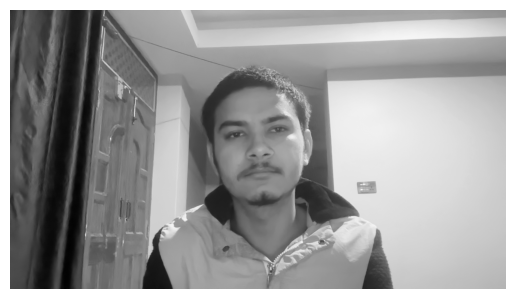

In [3]:
cap = cv.VideoCapture(0)  # Open webcam

if not cap.isOpened():
    print("Error!!! Could not open camera")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error!!! Could not read frame.")
            break    

        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        # Display the grayscale frame using OpenCV
        cv.imshow("Grayscale Video", frame_gray)

        # Press 'q' to exit
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv.destroyAllWindows()
cv.waitKey(1)

plt.imshow(frame_gray, cmap='gray')
plt.axis('off')
plt.show()